In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/home/nikolay37/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [32]:
data=pd.read_csv('video_sessions_transformed.csv')

In [3]:
data.head()

,user_id,video_owner_id,total_view_time,vk_platform,nav_screen,video_id
0,5137060586,197846393764,0,vk_video_ios,video_for_you,1524753638856
1,6791352918,255312742952,0,vk_video_android,video_search,1524750811524
2,8499858010,290290140528,2,vk_video_android,video_for_you,1524751697154
3,13064371614,296968444192,0,vk_video_android,video_search,1524751112304
4,15865765790,283074246524,0,vk_video_android,video_for_you,1524752278662


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4503 entries, 0 to 4502
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          4503 non-null   int64 
 1   video_owner_id   4503 non-null   int64 
 2   total_view_time  4503 non-null   int64 
 3   vk_platform      4503 non-null   object
 4   nav_screen       4503 non-null   object
 5   video_id         4503 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 211.2+ KB


In [5]:
data.describe()

,user_id,video_owner_id,total_view_time,video_id
count,4.503000e+03,4.503000e+03,4.503000e+03,4.503000e+03
mean,1.233544e+13,1.811593e+11,1.046599e+05,1.508005e+12
std,1.076879e+13,2.015803e+11,4.959592e+06,1.289130e+11
min,2.085183e+08,-1.122277e+12,-3.000000e+02,2.344280e+06
25%,2.248819e+12,1.377161e+11,0.000000e+00,1.524752e+12
50%,9.657196e+12,2.542896e+11,0.000000e+00,1.524754e+12
75%,2.048263e+13,2.839772e+11,2.000000e+00,1.524762e+12
max,3.729999e+13,2.649073e+12,2.405022e+08,1.525612e+12


In [33]:
#Фильтрация выбросов
data = data[data['user_id'] > 0] 
data = data[data['video_owner_id'] > 0]
data = data[data['video_id'] > 0]
data = data[data['total_view_time'].between(0, 36000)]
data = data[data['vk_platform'].isin(['vk_video_ios', 'vk_video_android'])]
data = data[data['nav_screen'].isin(['video_for_you', 'video_search', 'video_group_all', 'video_my_added', 'video_my_history', 'video_group_main', 'video_playlist', 'video_my_bookmarks', 'catalog_other'])]

In [36]:
data.describe()

,user_id,video_owner_id,total_view_time,video_id
count,4.251000e+03,4.251000e+03,4251.000000,4.251000e+03
mean,1.226171e+13,2.172070e+11,151.149847,1.513623e+12
std,1.075378e+13,1.164808e+11,912.265484,1.033062e+11
min,2.085183e+08,6.222800e+04,0.000000,3.921255e+11
25%,2.235947e+12,1.458193e+11,0.000000,1.524752e+12
50%,9.540103e+12,2.628085e+11,0.000000,1.524754e+12
75%,2.036391e+13,2.850011e+11,2.000000,1.524763e+12
max,3.729999e+13,2.649073e+12,25945.000000,1.525612e+12


<Axes: title={'center': 'Топ-10 сообществ по времени просмотра'}, xlabel='Время просмотра (сек)', ylabel='video_owner_id'>

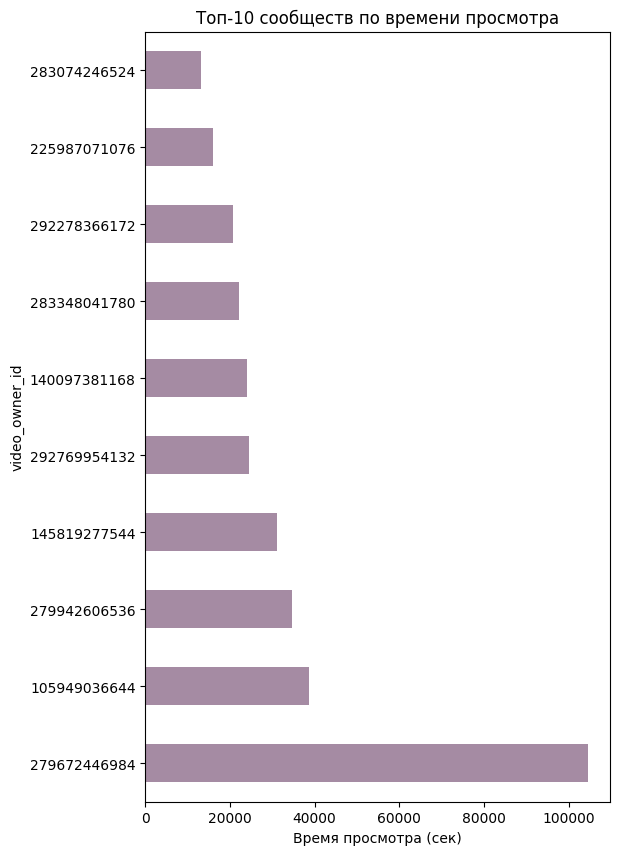

In [47]:
#Топ 10 сообществ по просмотрам
top_communities = data.groupby('video_owner_id')['total_view_time'].sum().nlargest(10)
top_communities_ = data.query('total_view_time >=30').groupby('video_owner_id')['total_view_time'].sum().nlargest(10)
top_communities.plot(kind='barh', figsize=(6, 10), title = 'Топ-10 сообществ по времени осознанного просмотра', xlabel='Время просмотра (сек)', alpha=0.4, color='r')
top_communities.plot(kind='barh', figsize=(6, 10), title = 'Топ-10 сообществ по времени просмотра', xlabel='Время просмотра (сек)', alpha = 0.4)

Я наложил barplot всех просмотров и только осознанных просмотров, и они практически полностью наложились друг на друга. Значит неосознанные просмотры не вносят большого импакта для больших сообществ.

In [61]:
#Записи осознанных просмотров
data_30 = data[data['total_view_time']>=30]
data_30.describe()

,user_id,video_owner_id,total_view_time,video_id
count,3.720000e+02,3.720000e+02,372.000000,3.720000e+02
mean,1.268645e+13,2.284962e+11,1710.575269,1.524765e+12
std,1.076088e+13,8.063955e+10,2619.401876,4.192590e+07
min,1.352498e+10,6.917900e+06,30.000000,1.524751e+12
25%,2.176565e+12,1.866016e+11,220.750000,1.524752e+12
50%,1.138968e+13,2.780090e+11,961.500000,1.524755e+12
75%,1.998602e+13,2.833181e+11,2160.250000,1.524763e+12
max,3.703276e+13,2.971912e+11,25945.000000,1.525327e+12


Осознанных просмотров осталось 372 (8,3% от общего числа)

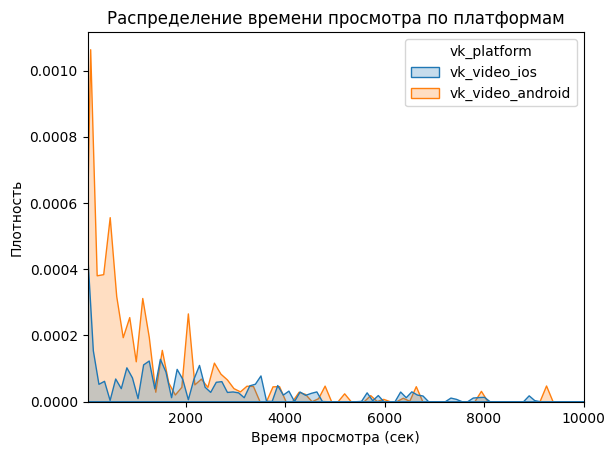

In [50]:
sns.kdeplot(data=data_30, x='total_view_time', hue='vk_platform',  fill=True, bw_adjust=0.03)
plt.title('Распределение времени просмотра по платформам')
plt.xlabel('Время просмотра (сек)')
plt.ylabel('Плотность')
plt.xlim(30, 10000)
plt.show()

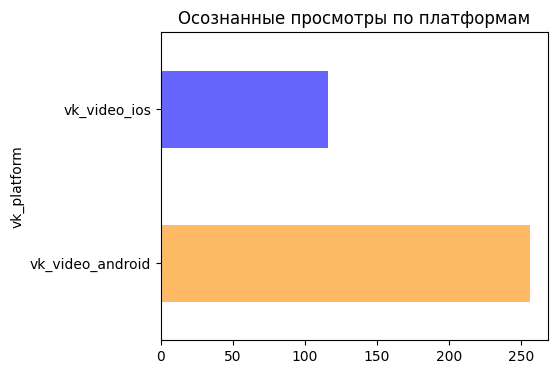

In [58]:
platform_count = data_30['vk_platform'].value_counts()
platform_count.plot(kind='barh', figsize=(5, 4), color=['darkorange', 'blue'],alpha=0.6, title='Осознанные просмотры по платформам', )
plt.show()

In [59]:
platform_count

vk_platform
vk_video_android    256
vk_video_ios        116
Name: count, dtype: int64